<a href="https://colab.research.google.com/github/Gareth001er/Garethai33/blob/main/Lab1_Foundations_of_NLP_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1: Foundations of NLP

In this lab you will **choose one** API to fetch approximately 200 words of live text, then use that text for all tasks below.

**TODO:** Pick your API from the list (see README/API docs), and implement the fetch in the first code cell.

In [5]:
# TODO: Fetch ~200 words of text from your chosen API

import requests

resp = requests.get(
    "https://en.wikipedia.org/api/rest_v1/page/summary/Miami"
).json()
text = resp["extract"]
print(text)


Miami is a coastal city in the U.S. state of Florida and the county seat of Miami-Dade County in South Florida. It is the core of the Miami metropolitan area, which, with a population of 6.14 million, is the second-largest metropolitan area in the Southeast after Atlanta, and the ninth-largest in the United States. With a population of 442,241 as of the 2020 census, Miami is the second-most populous city in Florida, after Jacksonville. Miami has the third-largest skyline in the U.S. with over 300 high-rises, 70 of which exceed 491 ft (150 m).


## 1. Text Preprocessing (30 pts)

- Use the `raw_text` variable you fetched.
- Tokenize, lowercase, remove punctuation.
- Remove stopwords.
- Plot the top-10 most frequent tokens.

**TODO:** Write your code below and commit after each sub-step.

In [6]:
# TODO: Tokenize and clean raw_text

import requests
import string

# Get summary text from Wikipedia API
resp = requests.get(
    "https://en.wikipedia.org/api/rest_v1/page/summary/Miami"
).json()
text = resp["extract"]

# Lowercase the text
text = text.lower()

# Remove punctuation
text = text.translate(str.maketrans("", "", string.punctuation))

# Tokenize (split into words)
tokens = text.split()

# Print the result
print(tokens)



['miami', 'is', 'a', 'coastal', 'city', 'in', 'the', 'us', 'state', 'of', 'florida', 'and', 'the', 'county', 'seat', 'of', 'miamidade', 'county', 'in', 'south', 'florida', 'it', 'is', 'the', 'core', 'of', 'the', 'miami', 'metropolitan', 'area', 'which', 'with', 'a', 'population', 'of', '614', 'million', 'is', 'the', 'secondlargest', 'metropolitan', 'area', 'in', 'the', 'southeast', 'after', 'atlanta', 'and', 'the', 'ninthlargest', 'in', 'the', 'united', 'states', 'with', 'a', 'population', 'of', '442241', 'as', 'of', 'the', '2020', 'census', 'miami', 'is', 'the', 'secondmost', 'populous', 'city', 'in', 'florida', 'after', 'jacksonville', 'miami', 'has', 'the', 'thirdlargest', 'skyline', 'in', 'the', 'us', 'with', 'over', '300', 'highrises', '70', 'of', 'which', 'exceed', '491', 'ft', '150', 'm']


In [7]:
# TODO: Remove stopwords
import requests
import string
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Fetch summary from Wikipedia
resp = requests.get("https://en.wikipedia.org/api/rest_v1/page/summary/Miami").json()
text = resp["extract"]

# Preprocess: lowercase, remove punctuation
text = text.lower()
text = text.translate(str.maketrans('', '', string.punctuation))

# Tokenize
tokens = text.split()

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

print(filtered_tokens)


['miami', 'coastal', 'city', 'us', 'state', 'florida', 'county', 'seat', 'miamidade', 'county', 'south', 'florida', 'core', 'miami', 'metropolitan', 'area', 'population', '614', 'million', 'secondlargest', 'metropolitan', 'area', 'southeast', 'atlanta', 'ninthlargest', 'united', 'states', 'population', '442241', '2020', 'census', 'miami', 'secondmost', 'populous', 'city', 'florida', 'jacksonville', 'miami', 'thirdlargest', 'skyline', 'us', '300', 'highrises', '70', 'exceed', '491', 'ft', '150']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


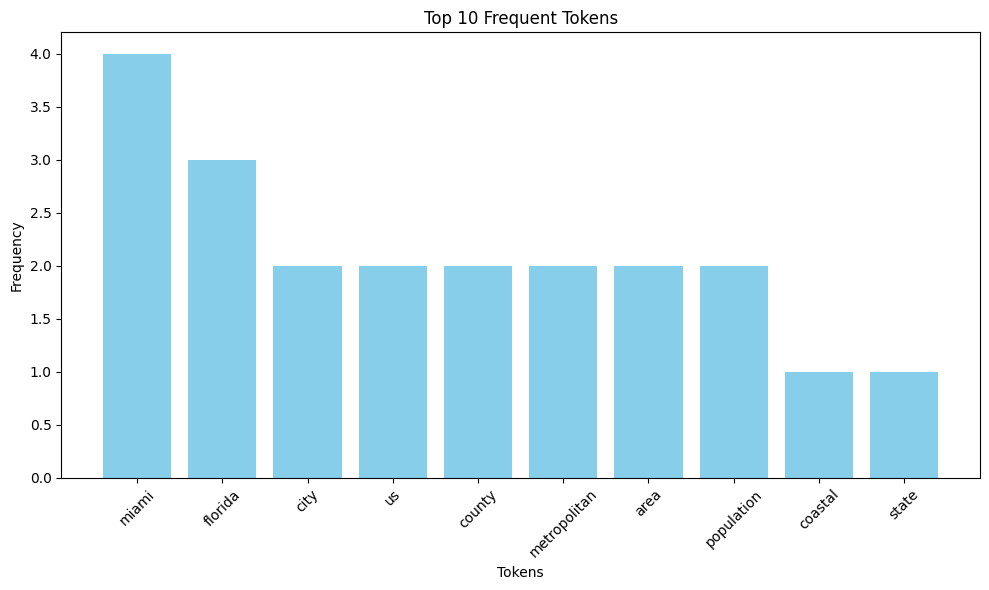

In [8]:
# TODO: Plot frequent tokens

import requests
import string
import nltk
from nltk.corpus import stopwords
from collections import Counter
import matplotlib.pyplot as plt

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Fetch summary from Wikipedia
resp = requests.get("https://en.wikipedia.org/api/rest_v1/page/summary/Miami").json()
text = resp["extract"]

# Preprocess: lowercase, remove punctuation
text = text.lower()
text = text.translate(str.maketrans('', '', string.punctuation))

# Tokenize
tokens = text.split()

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_tokens = [word for word in tokens if word not in stop_words]

# Count frequencies
token_counts = Counter(filtered_tokens)

# Get top 10 most common tokens
most_common = token_counts.most_common(10)

# Plotting
words, counts = zip(*most_common)
plt.figure(figsize=(10, 6))
plt.bar(words, counts, color='skyblue')
plt.title("Top 10 Frequent Tokens")
plt.xlabel("Tokens")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## 2. Synonym Generation (30 pts)

- Pick 5 tokens from your preprocessed results.
- Manually list 2-3 synonyms each.
- Use Google AI Studio Text API to generate synonyms for each.

**TODO:** Complete the code and reflections.

In [9]:
# TODO: Manually list synonyms
['miami', 'city', 'florida', 'metropolitan',  'county', ]



['miami', 'city', 'florida', 'metropolitan', 'county']

In [43]:
# TODO: Call Google AI Studio Text API for synonyms

from google import genai

client = genai.Client(api_key="Api key ")

response = client.models.generate_content(
    model="gemini-2.0-flash", contents="give me the synonyms for miami', 'city', 'florida', 'metropolitan', 'county "
)
print(response.text)


Okay, here are synonyms for the words you provided, with some considerations for different contexts:

**Miami**

*   **The Magic City:** A common nickname.
*   **The 305:** Refers to the area code.
*   **Little Havana's Home:** Emphasizes the Cuban influence.
*   **South Florida Hub:** Highlights Miami's importance in the region.
*   **The Gateway to Latin America:** Reflects Miami's connection to Latin American cultures and economies.

**City**

*   **Municipality:** A formal term for a city.
*   **Urban Center:** Focuses on the city as a hub of activity.
*   **Metropolis:** A large, bustling city (especially for "metropolitan city").
*   **Town:** (Can be used, though often implies a smaller size).
*   **Settlement:** A broad term for a place where people live.
*   **Locality:** A general term for a place or area.

**Florida**

*   **The Sunshine State:** A well-known nickname.
*   **The Peninsula State:** Referring to Florida's geography.
*   **The Everglades State:** Emphasizing a 

## 3. Part-of-Speech Annotation (20 pts)

- Select one sentence from `raw_text`.
- Manually tag each word with its POS.
- Call the AI Studio syntax endpoint and compare.

**TODO:** Implement tagging and comparison.

In [44]:
# TODO: Manual POS tagging
# Step 1: Securely input your API key
from getpass import getpass
import requests
import json

API_KEY = getpass("Enter your Google Cloud API Key: ")

# Step 2: Input the text you want to tag
text = "Miami is a vibrant city located in southern Florida."

# Step 3: Prepare the API request
url = f"https://language.googleapis.com/v1/documents:analyzeSyntax?key={API_KEY}"
headers = {"Content-Type": "application/json"}

data = {
    "document": {
        "type": "PLAIN_TEXT",
        "content": text
    },
    "encodingType": "UTF8"
}

# Step 4: Send the request
response = requests.post(url, headers=headers, json=data)
syntax_data = response.json()

# Step 5: Print tokens with POS tags
print("TOKEN\t\tPOS TAG")
print("-" * 30)
for token in syntax_data.get("tokens", []):
    word = token["text"]["content"]
    pos = token["partOfSpeech"]["tag"]
    print(f"{word:10}\t{pos}")



Enter your Google Cloud API Key: ··········
TOKEN		POS TAG
------------------------------


In [47]:
from vertexai.language_models import ChatModel
import vertexai

# Initialize Vertex AI (update with your region/project)
vertexai.init(project="your-project-id", location="us-central1")

# Load Gemini chat model (chat-bison or gemini-1.5-pro)
chat_model = ChatModel.from_pretrained("chat-bison@001")
chat = chat_model.start_chat()

# Prompt for syntax tagging
prompt = "Please tag each word in the following sentence with its part of speech:\n" \
         "'Miami is a vibrant city located in southern Florida.'\n" \
         "Format as: word (POS tag)"

response = chat.send_message(prompt)

# Output the result
print(response.text)


ERROR:grpc._plugin_wrapping:AuthMetadataPluginCallback "<google.auth.transport.grpc.AuthMetadataPlugin object at 0x79266033fed0>" raised exception!
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/google/auth/compute_engine/credentials.py", line 126, in refresh
    self._retrieve_info(request)
  File "/usr/local/lib/python3.11/dist-packages/google/auth/compute_engine/credentials.py", line 99, in _retrieve_info
    info = _metadata.get_service_account_info(
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/google/auth/compute_engine/_metadata.py", line 338, in get_service_account_info
    return get(request, path, params={"recursive": "true"})
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/google/auth/compute_engine/_metadata.py", line 263, in get
    raise exceptions.TransportError(
google.auth.exceptions.TransportError: ("Failed to retrieve http:/

RetryError: Timeout of 120.0s exceeded, last exception: 503 Getting metadata from plugin failed with error: ("Failed to retrieve http://metadata.google.internal/computeMetadata/v1/instance/service-accounts/default/?recursive=true from the Google Compute Engine metadata service. Status: 404 Response:\nb''", <google.auth.transport.requests._Response object at 0x7926604051d0>)

## 4. Thinking & Reflection (20 pts)

Answer in Markdown:
1. Which preprocessing step had the biggest impact? I belive the frist Text Preprocessing step seeing the wholw sentence being baeck down into a single Token like miami', 'coastal', 'city'then seeing that miami is the most frequent token.
2. What surprised you about the AI outputs? What surprised me was i got no earror while codeing  part 1 and 2 but i keept geing earror on  part 3 and how important words like miami  coastal  are to the nlp output.
3. How would you integrate manual rules and AI calls in a production pipeline?